In [ ]:
# 
# By Matt Taylor

In [8]:
# Import dependencies
import json
import requests
from citipy import citipy
import random
from config import api_key
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

random.seed(42)

In [9]:
# Create a list of random cities
city_list = []

# To combat numbers not being truly random, continue looping through the random numbers until 750 unique cities have been found
# REMEMBER TO UPDATE THIS TO 750 WHEN TESTING IS COMPLETED!!!!!
while len(city_list) < 50:
    ran_lat = random.uniform(-1.8, 1.8) * 100
    ran_long = random.uniform(-1.8, 1.8) * 100

    ran_city = citipy.nearest_city(ran_lat, ran_long)
    
    if not ran_city.city_name in city_list:
        city_list.append(ran_city.city_name)

# Confirming the size of the list and therefore the number of unique cities found
print(f"Number of unique cities found is: {len(city_list)}")

Number of unique cities found is: 50


In [10]:
# Create a dataframe to store data in upcoming API calls
city_df = pd.DataFrame(city_list)
city_df.columns = ["City"]

# Adding empty columns
city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Max Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Country"] = ""
city_df["Date"] = ""

# Previewing the dataframe
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,,,,,,,,
1,punta arenas,,,,,,,,
2,amderma,,,,,,,,
3,barrow,,,,,,,,
4,vaini,,,,,,,,


In [11]:
# Call the Open Weather API to search each city and populate the dataframe with information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print("Beginning Data Retreival")
print("-----------------------------")

for index, city in city_df.iterrows():
    
    city_name = city["City"]
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city_name

    try:
        response = requests.get(query_url)
        city_data = response.json()

        city_df.loc[index, "Lat"] = city_data["coord"]["lat"]
        city_df.loc[index, "Lng"] = city_data["coord"]["lon"]

        city_df.loc[index, "Max Temp"] = city_data["main"]["temp_max"]

        city_df.loc[index, "Humidity"] = city_data["main"]["humidity"]

        city_df.loc[index, "Cloudiness"] = city_data["clouds"]["all"]

        city_df.loc[index, "Wind Speed"] = city_data["wind"]["speed"]

        city_df.loc[index, "Country"] = city_data["sys"]["country"]

        city_df.loc[index, "Date"] = city_data["dt"]

        print(f"Processing Record {index + 1} | {city_name}")
        
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retreival
-----------------------------
Processing Record 1 | bethel
Processing Record 2 | punta arenas
City not found. Skipping...
Processing Record 4 | barrow
Processing Record 5 | vaini
Processing Record 6 | hermanus
Processing Record 7 | ushuaia
Processing Record 8 | bialogard
Processing Record 9 | port elizabeth
City not found. Skipping...
Processing Record 11 | dikson
Processing Record 12 | rikitea
Processing Record 13 | qaanaaq
Processing Record 14 | longyearbyen
Processing Record 15 | butaritari
Processing Record 16 | bredasdorp
City not found. Skipping...
Processing Record 18 | torbay
Processing Record 19 | castro
Processing Record 20 | bluff
Processing Record 21 | dankov
Processing Record 22 | albany
Processing Record 23 | dwarka
Processing Record 24 | khatanga
Processing Record 25 | mataura
Processing Record 26 | nanortalik
City not found. Skipping...
Processing Record 28 | mantua
Processing Record 29 | katsuura
Processing Record 30 | lebu
City not found. Skip

In [12]:
# For the rows where the city data was not found, drop those rows from the dataframe
NaN = float("NaN")
city_df.replace("", NaN, inplace=True)
city_df.dropna(subset = ["Lat"], inplace=True)

# Export dataframe to a CSV
path = "output/city_data.csv"
city_df.to_csv(path, index=False)

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.37,-73.41,60.80,100.0,90.0,1.10,US,1.601114e+09
1,punta arenas,-53.15,-70.92,41.00,80.0,20.0,20.80,CL,1.601114e+09
3,barrow,71.29,-156.79,32.00,99.0,90.0,11.41,US,1.601114e+09
4,vaini,-21.20,-175.20,73.40,83.0,75.0,9.17,TO,1.601114e+09
5,hermanus,-34.42,19.23,57.99,58.0,34.0,8.99,ZA,1.601114e+09


In [13]:
# Using describe to quickly look at the summary statistics, we can determine there are no cities with >100% humidity from this
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01
mean,13.345111,7.521556,56.286444,76.133333,50.044444,10.600444,1.601114e+09
std,45.498514,98.776755,16.840462,18.031034,38.442966,7.927766,6.835009e+01
min,-54.800000,-175.200000,12.830000,32.000000,0.000000,1.010000,1.601114e+09
25%,-33.020000,-71.340000,42.010000,70.000000,9.000000,4.700000,1.601114e+09
50%,16.480000,15.640000,57.990000,80.000000,43.000000,8.990000,1.601114e+09
75%,54.010000,81.830000,68.000000,89.000000,90.000000,13.470000,1.601114e+09
max,78.220000,172.790000,85.320000,100.000000,100.000000,35.570000,1.601114e+09


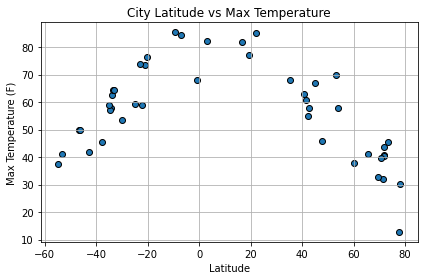

In [22]:
# Plotting the data
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig1.png")
plt.show()

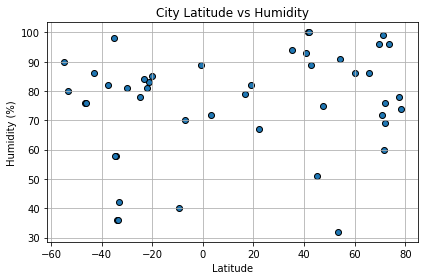

In [23]:
# Plotting the data
y_values = city_df["Humidity"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig2.png")
plt.show()

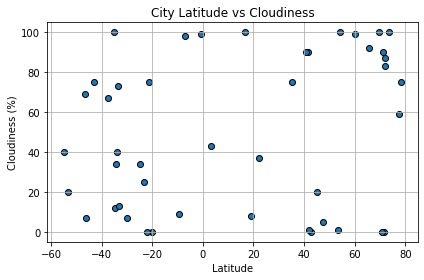

In [24]:
# Plotting the data
y_values = city_df["Cloudiness"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig3.png")
plt.show()

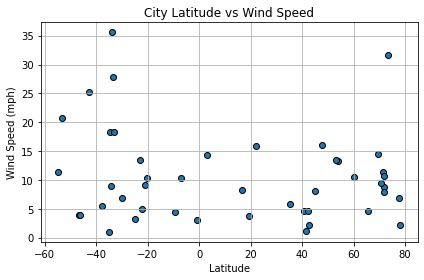

In [25]:
# Plotting the data
y_values = city_df["Wind Speed"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig4.png")
plt.show()